In [1]:
import sys; sys.path.append("../")  

import os
import pandas as pd

from argoverse.map_representation.map_api import ArgoverseMap

from plot_utils import plot_centerline,plot_track, plot_projection, plot_projection, fig_cut
from frenet import centerline_to_segment, points_to_kb, find_projection, projection_to_sd
from argoverse_utils import select_all, check_city_graph_exits_or_create_new_one, df_to_centerline, G2path, df_to_avxy, select_path
import matplotlib.pyplot as plt
import numpy as np

In [2]:
avm = ArgoverseMap()

In [3]:
upper = 0

source = 'path/to/the/csv/folder/'
filename = os.listdir(source)[0]
file_path = os.path.join(source, filename)
df = pd.read_csv(file_path)

G_pit = check_city_graph_exits_or_create_new_one(avm, "PIT", source)
G_mia = check_city_graph_exits_or_create_new_one(avm, "MIA", source)

PIT graph has existed.
MIA graph has existed.


In [4]:
# centerline: array(n_lines, m_points, 3)
centerline, lane_ids, city_name = df_to_centerline(avm, df,5)

# segment: array(n_lines, k_segs, 2, 3), k = m -1
segment = centerline_to_segment(centerline)

# k, b: array(n_lines, k_segs),
k, b = points_to_kb(segment)

sub_G = G_pit.subgraph(lane_ids) if city_name == "PIT" else G_mia.subgraph(lane_ids)

paths, paths_ids = G2path(sub_G, lane_ids, upper)

xl, yl = df_to_avxy(df)

selected_path = select_path(xl, yl, k, b, segment, paths_ids, centerline)

# NOTE: Uncomment transform all coordinates. 
# We only transformed the coordinates of the AGENT here for the purpose of subsequent visualization.

# xl, yl = df.X.to_list(), df.Y.to_list() 

centerline, segment, k, b = select_all(selected_path, centerline, segment, k, b)

projection = find_projection(xl, yl, k, b, segment, centerline=centerline)

s, d, direction = projection_to_sd(centerline, projection, xl, yl, k, b ,segment)


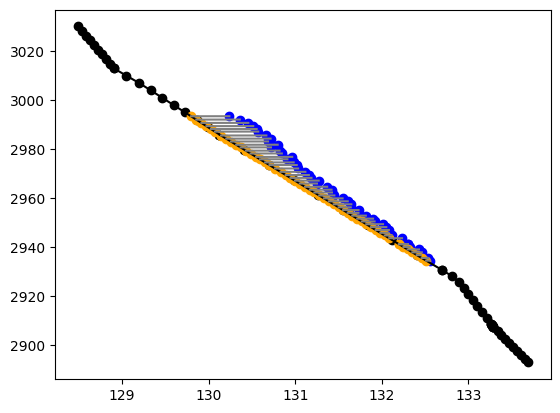

In [5]:
plot_centerline(centerline, mode='black')
plot_track(xl, yl)
plot_projection(projection, xl=xl, yl=yl, connection=True)

(2980.0, 2985.0)

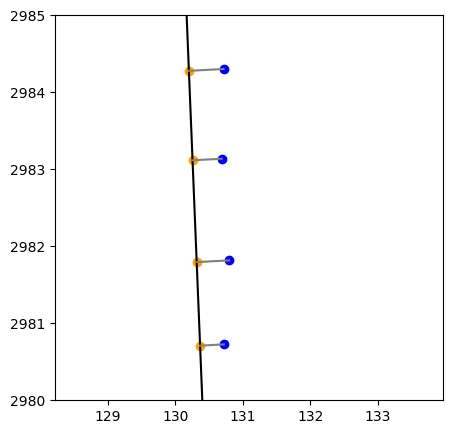

In [6]:
fig = plt.figure(figsize=(5, 5))

plot_centerline(centerline, mode='black')
plot_track(xl, yl)
plot_projection(projection, xl=xl, yl=yl, connection=True)

plt.ylim(2980, 2985)